In [107]:
from os.path import join
import numpy as np
import pandas as pd
from nilearn import plotting
from nilearn import regions, maskers, masking, image, surface


In [94]:
main_dir = '/Users/h/Documents/projects_local/Tian2020MSA/3T/Cortex-Subcortex'
subcortex = join(main_dir,'MNIvolumetric', 'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_3T_MNI152NLin2009cAsym_2mm.nii.gz')
subcortex_label = join(main_dir,  'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_label.txt')


(97, 115, 97)

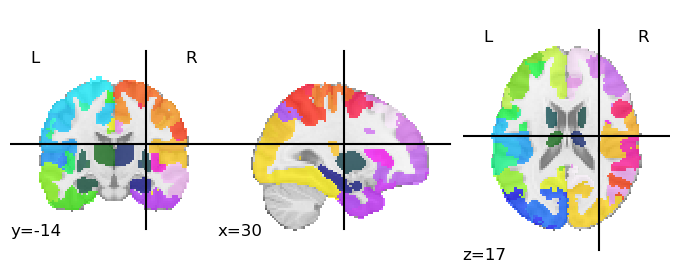

In [88]:
plotting.plot_roi(subcortex)
subcortex_atlas = image.load_img(subcortex)
subcortex_atlas.shape

In [99]:
labels = pd.read_csv(subcortex_label, sep='\t', header=None)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


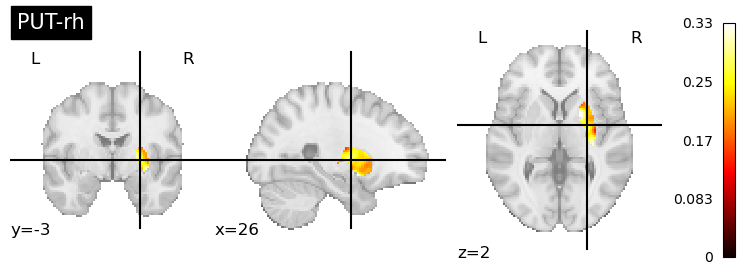

In [105]:
high_cue = '/Users/h/Documents/projects_local/sandbox/cue/sub-avg_ses-avg_run-avg_task-pain_event-stimulus_cuetype-high.nii.gz'
ref_img = image.load_img(high_cue)
canlab_dir = '/Users/h/Documents/MATLAB/CanlabCore'
mask = image.load_img(join(canlab_dir, 'CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii'))
# get region index
atlas_index = 7
atlas_label = labels.iloc[atlas_index*2-2,0]
region_mask = (subcortex_atlas.get_fdata() == atlas_index)
masked_roi = image.new_img_like(subcortex_atlas, region_mask)
masker = maskers.NiftiMasker(mask_img=masked_roi)
masked_data = masker.fit_transform(ref_img)
masked_img = masker.inverse_transform(masked_data)
plotting.plot_stat_map(masked_img, title=f"{atlas_label}")